## RDD Basics
- An RDD in Spark is simply an immutable distributed collection of objects. Each RDD is split into multiple partitions, which may be computed on different nodes of the cluster

## Lazy Evaluation
- As you read earlier, transformations on RDDs are lazily evaluated, meaning that
Spark will not begin to execute until it sees an action.

In [2]:
lines = sc.textFile("spark.txt")

In [3]:
lines.collect()

['hello from txt to pyspark',
 'hello from txt to pyspark2',
 'hello from txt to pyspark3',
 'hello from txt to pyspark4',
 'hello from txt to pyspark5',
 'hello from txt to pyspark6',
 'hello from python to pyspark1',
 'hello from python to pyspark2']

### Transformations
- Transformations are operations on RDDs that return a new RDD. transformed RDDs are computed lazily, only when you
    use them in an action. Many transformations are element-wise; that is, they work on
    one element at a time; but this is not true for all transformations

### Actions 
- Actions are the secondtype of RDD operation. They are the operations that return a final value to the driver program or write data to an external storage system.
- Actions force the evaluation of the transformations required for the RDD they were called on, since they need to actually produce outpu

In [2]:
lines.collect()

['hello from txt to pyspark',
 'hello from txt to pyspark2',
 'hello from txt to pyspark3',
 'hello from txt to pyspark4',
 'hello from txt to pyspark5',
 'hello from txt to pyspark6',
 'hello from python to pyspark1',
 'hello from python to pyspark2']

In [4]:
lines.first()

'hello from txt to pyspark'

In [5]:
pythonLines = lines.filter(lambda line: "python" in line)

In [6]:
pythonLines

PythonRDD[3] at RDD at PythonRDD.scala:53

In [7]:
pythonLines.collect()

['hello from python to pyspark1', 'hello from python to pyspark2']

## you will often use persist() to load a subset of your data into memory and query it repeatedly

In [6]:
pythonLines.persist

<bound method RDD.persist of PythonRDD[3] at collect at <ipython-input-5-91a84fb8e689>:1>

In [8]:
pythonLines.count()

2

### Actions:

In [8]:
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"])

In [9]:

counts = words.count()
print ("Number of elements in RDD -> %i" % (counts))


Number of elements in RDD -> 8


## The map() transformation takes in a function and applies it to each element in the RDD with the result of the function being the new value of each element in the resulting RDD. The filter() transformation takes in a function and returns an RDD that only has elements that pass the filter() function.

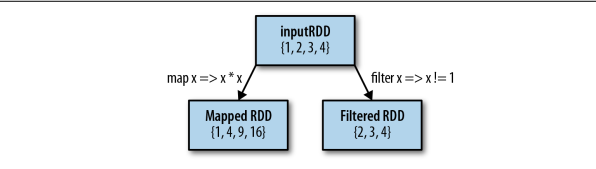

In [9]:
nums = sc.parallelize([1, 2, 3, 4])
squared = nums.map(lambda x: x * x).collect()
squared

[1, 4, 9, 16]

In [10]:
nums = sc.parallelize([1, 2, 3, 4])
filtered = nums.filter(lambda x: x !=1).collect()
filtered

[1, 2, 3, 4]

## As with map(), the function we provide to flatMap() is called individually for each element in our input RDD. Instead of returning a single element, we return an iterator with our return values. Rather than producing an RDD of iterators, we get back an RDD that consists of the elements from all of the iterators

In [12]:
lines = sc.parallelize(["hello world", "hi pepole","hi human","hi alien"])
words = lines.map(lambda line: line.split(" "))
words.collect()

[['hello', 'world'], ['hi', 'pepole'], ['hi', 'human'], ['hi', 'alien']]

In [13]:
lines = sc.parallelize(["hello world", "hi pepole","hi human","hi alien"])
words = lines.flatMap(lambda line: line.split(" "))

In [14]:
words.collect()

['hello', 'world', 'hi', 'pepole', 'hi', 'human', 'hi', 'alien']

In [15]:
words.distinct().collect()

['pepole', 'human', 'alien', 'hello', 'hi', 'world']

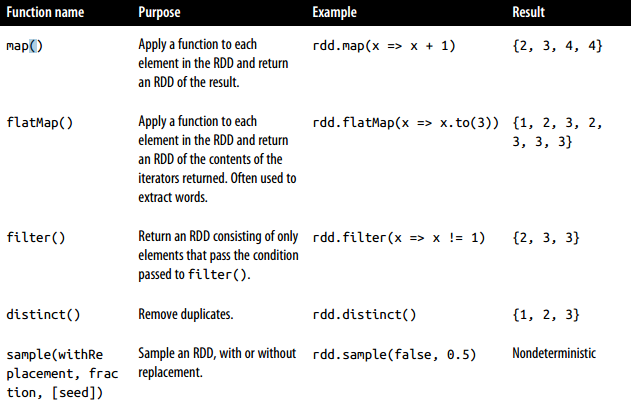

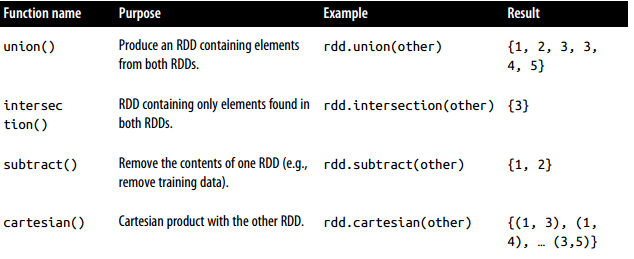

In [16]:
words.union(words).collect()

['hello',
 'world',
 'hi',
 'pepole',
 'hi',
 'human',
 'hi',
 'alien',
 'hello',
 'world',
 'hi',
 'pepole',
 'hi',
 'human',
 'hi',
 'alien']

In [17]:
words.intersection(words).collect()

['alien', 'hello', 'pepole', 'human', 'hi', 'world']

In [18]:
words.subtract(words).collect()

[]

In [19]:
words.cartesian(words).collect()

[('hello', 'hello'),
 ('hello', 'world'),
 ('world', 'hello'),
 ('world', 'world'),
 ('hello', 'hi'),
 ('hello', 'pepole'),
 ('world', 'hi'),
 ('world', 'pepole'),
 ('hello', 'hi'),
 ('hello', 'human'),
 ('world', 'hi'),
 ('world', 'human'),
 ('hello', 'hi'),
 ('hello', 'alien'),
 ('world', 'hi'),
 ('world', 'alien'),
 ('hi', 'hello'),
 ('hi', 'world'),
 ('pepole', 'hello'),
 ('pepole', 'world'),
 ('hi', 'hi'),
 ('hi', 'pepole'),
 ('pepole', 'hi'),
 ('pepole', 'pepole'),
 ('hi', 'hi'),
 ('hi', 'human'),
 ('pepole', 'hi'),
 ('pepole', 'human'),
 ('hi', 'hi'),
 ('hi', 'alien'),
 ('pepole', 'hi'),
 ('pepole', 'alien'),
 ('hi', 'hello'),
 ('hi', 'world'),
 ('human', 'hello'),
 ('human', 'world'),
 ('hi', 'hi'),
 ('hi', 'pepole'),
 ('human', 'hi'),
 ('human', 'pepole'),
 ('hi', 'hi'),
 ('hi', 'human'),
 ('human', 'hi'),
 ('human', 'human'),
 ('hi', 'hi'),
 ('hi', 'alien'),
 ('human', 'hi'),
 ('human', 'alien'),
 ('hi', 'hello'),
 ('hi', 'world'),
 ('alien', 'hello'),
 ('alien', 'world'),
 (

In [20]:
words.count()

8

In [21]:
words.take(2)

['hello', 'world']

In [22]:
words.top(2)

['world', 'pepole']

In [23]:
pairs = lines.map(lambda x: (x.split(" ")[0], x))

In [24]:
pairs.collect()

[('hello', 'hello world'),
 ('hi', 'hi pepole'),
 ('hi', 'hi human'),
 ('hi', 'hi alien')]

### Map reduce

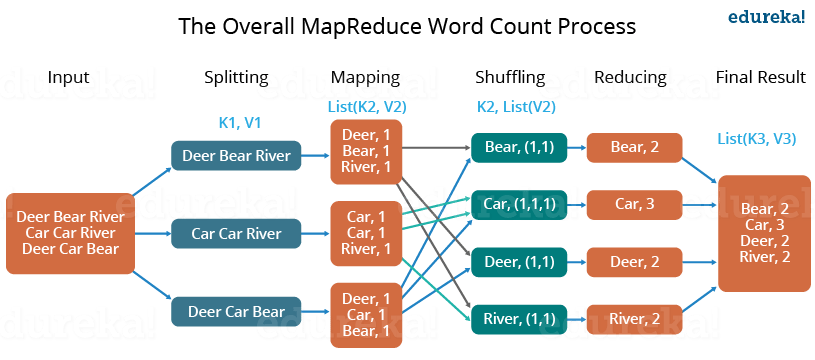

In [11]:
rdd = sc.textFile("spark.txt")
words = rdd.flatMap(lambda x: x.split(" "))
result = words.map(lambda x: (x, 1))
result.collect()

[('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark', 1),
 ('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark2', 1),
 ('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark3', 1),
 ('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark4', 1),
 ('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark5', 1),
 ('hello', 1),
 ('from', 1),
 ('txt', 1),
 ('to', 1),
 ('pyspark6', 1),
 ('hello', 1),
 ('from', 1),
 ('python', 1),
 ('to', 1),
 ('pyspark1', 1),
 ('hello', 1),
 ('from', 1),
 ('python', 1),
 ('to', 1),
 ('pyspark2', 1)]

In [13]:
result.reduceByKey(lambda x, y: x + y).collect()

[('pyspark2', 2),
 ('pyspark3', 1),
 ('pyspark4', 1),
 ('pyspark5', 1),
 ('pyspark6', 1),
 ('python', 2),
 ('pyspark1', 1),
 ('hello', 8),
 ('from', 8),
 ('txt', 6),
 ('to', 8),
 ('pyspark', 1)]

In [26]:
result.collect()

[('pyspark2', 2),
 ('pyspark3', 1),
 ('pyspark4', 1),
 ('pyspark5', 1),
 ('pyspark6', 1),
 ('python', 2),
 ('pyspark1', 1),
 ('hello', 8),
 ('from', 8),
 ('txt', 6),
 ('to', 8),
 ('pyspark', 1)]

In [27]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithSGD, LogisticRegressionWithLBFGS, SVMWithSGD, NaiveBayes
from pyspark.mllib.tree import DecisionTree, GradientBoostedTrees, RandomForest
from pyspark.mllib.evaluation import MulticlassMetrics

In [28]:
spam = sc.textFile("hspam.txt")
ham = sc.textFile("ham.txt")

In [29]:
spam.take(2)

['You have 1 new message. Please call 08712400200.',
 'Urgent! Please call 09061743811 from landline. Your ABTA complimentary 4* Tenerife Holiday or £5000 cash await collection SAE T&Cs Box 326 CW25WX 150ppm']

In [30]:
ham.take(2)

['Rofl. Its true to its name',
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"]

In [31]:
spam_words = spam.map(lambda email: email.split())
ham_words = ham.map(lambda email: email.split())

In [32]:
print(spam_words.take(2))
print(ham_words.take(2))

[['You', 'have', '1', 'new', 'message.', 'Please', 'call', '08712400200.'], ['Urgent!', 'Please', 'call', '09061743811', 'from', 'landline.', 'Your', 'ABTA', 'complimentary', '4*', 'Tenerife', 'Holiday', 'or', '£5000', 'cash', 'await', 'collection', 'SAE', 'T&Cs', 'Box', '326', 'CW25WX', '150ppm']]
[['Rofl.', 'Its', 'true', 'to', 'its', 'name'], ['The', 'guy', 'did', 'some', 'bitching', 'but', 'I', 'acted', 'like', "i'd", 'be', 'interested', 'in', 'buying', 'something', 'else', 'next', 'week', 'and', 'he', 'gave', 'it', 'to', 'us', 'for', 'free']]


In [33]:
tf = HashingTF(numFeatures = 2000)
spam_features = tf.transform(spam_words)
ham_features = tf.transform(ham_words)

In [34]:
print(spam_features.take(2))
print(ham_features.take(2))

[SparseVector(2000, {222: 1.0, 300: 1.0, 459: 1.0, 495: 1.0, 706: 1.0, 882: 1.0, 1222: 1.0, 1925: 1.0}), SparseVector(2000, {26: 1.0, 29: 1.0, 41: 1.0, 60: 1.0, 222: 2.0, 368: 1.0, 444: 1.0, 644: 1.0, 706: 1.0, 870: 1.0, 929: 1.0, 1069: 1.0, 1233: 1.0, 1307: 1.0, 1382: 1.0, 1388: 1.0, 1486: 1.0, 1699: 1.0, 1726: 1.0, 1873: 1.0, 1903: 1.0, 1959: 1.0})]
[SparseVector(2000, {228: 1.0, 365: 1.0, 463: 1.0, 470: 1.0, 808: 1.0, 1416: 1.0}), SparseVector(2000, {52: 1.0, 365: 1.0, 367: 1.0, 373: 1.0, 437: 1.0, 683: 1.0, 755: 1.0, 775: 1.0, 827: 1.0, 910: 1.0, 936: 1.0, 1003: 1.0, 1016: 1.0, 1101: 1.0, 1136: 1.0, 1202: 1.0, 1260: 1.0, 1363: 1.0, 1378: 1.0, 1614: 1.0, 1640: 1.0, 1651: 1.0, 1696: 1.0, 1800: 1.0, 1840: 1.0, 1921: 1.0})]


In [35]:
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
ham_samples = ham_features.map(lambda features:LabeledPoint(0, features))

print(spam_samples.take(1))
print(ham_samples.take(1))

[LabeledPoint(1.0, (2000,[222,300,459,495,706,882,1222,1925],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))]
[LabeledPoint(0.0, (2000,[228,365,463,470,808,1416],[1.0,1.0,1.0,1.0,1.0,1.0]))]


In [36]:
samples = spam_samples.union(ham_samples)
[training_data, test_data] = samples.randomSplit([0.8, 0.2])
training_data.cache()
test_data.cache()

PythonRDD[65] at RDD at PythonRDD.scala:53

In [37]:
def score(model):
    predictions = model.predict(test_data.map(lambda x: x.features))
    labels_and_preds = test_data.map(lambda x: x.label).zip(predictions)
    accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_data.count())
    return accuracy

In [38]:
algo = LogisticRegressionWithSGD()
model = algo.train(training_data)

In [39]:
score(model)

0.9071691176470589

In [40]:
algo = SVMWithSGD()
model = algo.train(training_data)

In [41]:
score(model)

0.9338235294117647

In [42]:
algo = DecisionTree()
model = algo.trainClassifier(training_data,numClasses=2,categoricalFeaturesInfo={})

In [43]:
score(model)

0.921875

In [44]:
algo = RandomForest()
model = algo.trainClassifier(training_data,numClasses=2,categoricalFeaturesInfo={},numTrees=16)

In [45]:
score(model)

0.8667279411764706

In [46]:
algo = NaiveBayes()
model = algo.train(training_data)

In [47]:
score(model)

0.9669117647058824

In [48]:
spamExample = tf.transform("You have won $1,000,000. Please fly to Nigeria ASAP".split(" "))
hamExample = tf.transform("Spark is really good at data processing".split(" "))

print(model.predict(spamExample))
print(model.predict(hamExample))

1.0
0.0
